# Project: Wrangling and Analyze Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import requests
import os
import json
import tweepy
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Reading the csv file into a dataframe
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Checking the dataframe
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_twitter_archive.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# Define the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
# Download the file using requests
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
# Reading data into a dataframe
df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
# Checking the dataframe
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#Connecting to the Twitter API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
#Getting tweets ids
tweet_ids = df_twitter_archive['tweet_id'].values
len(tweet_ids)

2356

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": ")
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 
Success
2: 
Success
3: 
Success
4: 
Success
5: 
Success
6: 
Success
7: 
Success
8: 
Success
9: 
Success
10: 
Success
11: 
Success
12: 
Success
13: 
Success
14: 
Success
15: 
Success
16: 
Success
17: 
Success
18: 
Success
19: 
Success
20: 
Fail
21: 
Success
22: 
Success
23: 
Success
24: 
Success
25: 
Success
26: 
Success
27: 
Success
28: 
Success
29: 
Success
30: 
Success
31: 
Success
32: 
Success
33: 
Success
34: 
Success
35: 
Success
36: 
Success
37: 
Success
38: 
Success
39: 
Success
40: 
Success
41: 
Success
42: 
Success
43: 
Success
44: 
Success
45: 
Success
46: 
Success
47: 
Success
48: 
Success
49: 
Success
50: 
Success
51: 
Success
52: 
Success
53: 
Success
54: 
Success
55: 
Success
56: 
Success
57: 
Success
58: 
Success
59: 
Success
60: 
Success
61: 
Success
62: 
Success
63: 
Success
64: 
Success
65: 
Success
66: 
Success
67: 
Success
68: 
Success
69: 
Success
70: 
Success
71: 
Success
72: 
Success
73: 
Success
74: 
Success
75: 
Success
76: 
Success
77: 
Success
78: 
Succes

Success
599: 
Success
600: 
Success
601: 
Success
602: 
Success
603: 
Success
604: 
Success
605: 
Success
606: 
Success
607: 
Success
608: 
Success
609: 
Success
610: 
Success
611: 
Success
612: 
Success
613: 
Success
614: 
Success
615: 
Success
616: 
Success
617: 
Success
618: 
Success
619: 
Success
620: 
Success
621: 
Success
622: 
Success
623: 
Success
624: 
Success
625: 
Success
626: 
Success
627: 
Success
628: 
Success
629: 
Success
630: 
Success
631: 
Success
632: 
Success
633: 
Success
634: 
Success
635: 
Success
636: 
Success
637: 
Success
638: 
Success
639: 
Success
640: 
Success
641: 
Success
642: 
Success
643: 
Success
644: 
Success
645: 
Success
646: 
Success
647: 
Success
648: 
Success
649: 
Success
650: 
Success
651: 
Success
652: 
Success
653: 
Success
654: 
Success
655: 
Success
656: 
Success
657: 
Success
658: 
Success
659: 
Success
660: 
Success
661: 
Success
662: 
Success
663: 
Success
664: 
Success
665: 
Success
666: 
Success
667: 
Success
668: 
Success
669: 
Succes

Rate limit reached. Sleeping for: 658


Success
902: 
Success
903: 
Success
904: 
Success
905: 
Success
906: 
Success
907: 
Success
908: 
Success
909: 
Success
910: 
Success
911: 
Success
912: 
Success
913: 
Success
914: 
Success
915: 
Success
916: 
Success
917: 
Success
918: 
Success
919: 
Success
920: 
Success
921: 
Success
922: 
Success
923: 
Success
924: 
Success
925: 
Success
926: 
Success
927: 
Success
928: 
Success
929: 
Success
930: 
Success
931: 
Success
932: 
Success
933: 
Fail
934: 
Success
935: 
Success
936: 
Success
937: 
Success
938: 
Success
939: 
Success
940: 
Success
941: 
Success
942: 
Success
943: 
Success
944: 
Success
945: 
Success
946: 
Success
947: 
Success
948: 
Success
949: 
Success
950: 
Success
951: 
Success
952: 
Success
953: 
Success
954: 
Success
955: 
Success
956: 
Success
957: 
Success
958: 
Success
959: 
Success
960: 
Success
961: 
Success
962: 
Success
963: 
Success
964: 
Success
965: 
Success
966: 
Success
967: 
Success
968: 
Success
969: 
Success
970: 
Success
971: 
Success
972: 
Success
9

Success
1455: 
Success
1456: 
Success
1457: 
Success
1458: 
Success
1459: 
Success
1460: 
Success
1461: 
Success
1462: 
Success
1463: 
Success
1464: 
Success
1465: 
Success
1466: 
Success
1467: 
Success
1468: 
Success
1469: 
Success
1470: 
Success
1471: 
Success
1472: 
Success
1473: 
Success
1474: 
Success
1475: 
Success
1476: 
Success
1477: 
Success
1478: 
Success
1479: 
Success
1480: 
Success
1481: 
Success
1482: 
Success
1483: 
Success
1484: 
Success
1485: 
Success
1486: 
Success
1487: 
Success
1488: 
Success
1489: 
Success
1490: 
Success
1491: 
Success
1492: 
Success
1493: 
Success
1494: 
Success
1495: 
Success
1496: 
Success
1497: 
Success
1498: 
Success
1499: 
Success
1500: 
Success
1501: 
Success
1502: 
Success
1503: 
Success
1504: 
Success
1505: 
Success
1506: 
Success
1507: 
Success
1508: 
Success
1509: 
Success
1510: 
Success
1511: 
Success
1512: 
Success
1513: 
Success
1514: 
Success
1515: 
Success
1516: 
Success
1517: 
Success
1518: 
Success
1519: 
Success
1520: 
Success
15

Rate limit reached. Sleeping for: 644


Success
1803: 
Success
1804: 
Success
1805: 
Success
1806: 
Success
1807: 
Success
1808: 
Success
1809: 
Success
1810: 
Success
1811: 
Success
1812: 
Success
1813: 
Success
1814: 
Success
1815: 
Success
1816: 
Success
1817: 
Success
1818: 
Success
1819: 
Success
1820: 
Success
1821: 
Success
1822: 
Success
1823: 
Success
1824: 
Success
1825: 
Success
1826: 
Success
1827: 
Success
1828: 
Success
1829: 
Success
1830: 
Success
1831: 
Success
1832: 
Success
1833: 
Success
1834: 
Success
1835: 
Success
1836: 
Success
1837: 
Success
1838: 
Success
1839: 
Success
1840: 
Success
1841: 
Success
1842: 
Success
1843: 
Success
1844: 
Success
1845: 
Success
1846: 
Success
1847: 
Success
1848: 
Success
1849: 
Success
1850: 
Success
1851: 
Success
1852: 
Success
1853: 
Success
1854: 
Success
1855: 
Success
1856: 
Success
1857: 
Success
1858: 
Success
1859: 
Success
1860: 
Success
1861: 
Success
1862: 
Success
1863: 
Success
1864: 
Success
1865: 
Success
1866: 
Success
1867: 
Success
1868: 
Success
18

Success
2350: 
Success
2351: 
Success
2352: 
Success
2353: 
Success
2354: 
Success
2355: 
Success
2356: 
Success
1959.6965961669998
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n34 - Sorry, that page does not exist.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFo

In [9]:
# Reading the json file into a dataframe
df_api = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as file:
    for line in file:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                              columns=['tweet_id', 'retweet_count', 'favorite_count']))

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_api = df_api.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
/var/folders/qb/2_kn7cqn6j77y3czrmwryj300000gn/T/ipykernel_1770/2889778288.py:9: FutureWarning: The frame.app

In [10]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33820
0,892177421306343426,5302,29337
0,891815181378084864,3481,22052
0,891689557279858688,7227,36947
0,891327558926688256,7763,35315


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
#Visual assessment of the df_twitter_archive dataframe
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
#Explore datatypes and nulls in the dataframe
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
#Explore descriptive statistics 
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
#Explore the distribution of values in the rating_denominator column
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
#Explore the rows that are retweets
df_twitter_archive[df_twitter_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [16]:
#Explore the rows that are replys
df_twitter_archive[df_twitter_archive['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [17]:
#See the most common names for dogs
df_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
# Visual assessment of the df_image_prediction dataframe
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
#Explore datatypes and nulls in the dataframe
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# Visual assessment of the df_image_prediction dataframe
df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33820
0,892177421306343426,5302,29337
0,891815181378084864,3481,22052
0,891689557279858688,7227,36947
0,891327558926688256,7763,35315
...,...,...,...
0,666049248165822465,37,89
0,666044226329800704,115,247
0,666033412701032449,36,100
0,666029285002620928,39,112


In [21]:
#Explore datatypes and nulls in the dataframe
df_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   object
 2   favorite_count  2327 non-null   object
dtypes: object(3)
memory usage: 72.7+ KB


### Quality issues
1. The `tweet_id` column in the `df_image_prediction` and in the `df_twitter_archive` is an int, while it is a string in the other dataframe.

2. The `retweet_count` and the `favorite_count` in the `df_api` are strings, they should be int as they represent numbers.

3. The `df_twitter_archive` has rows of tweets that were retweets. We only want original ratings from the WeRateDogs account.

4. The `timestamp` column in the `df_twitter_archive` dataframe should be of datetime type.

5. The `rating_denominator` in the `df_twitter_archive` is not always equal to 10.

6. The `name`, `doggo`, `floffer`, `pupper` and `puppo` columns in the `df_twitter_archive` dataframe have the string value 'None' instead of the null value for null values.

7. Dogs named 'a' and 'the' in the `df_twitter_archive`.

8. The `df_twitter_archive` has rows of tweets that were replys. We only want original ratings in the dataframe.

### Tidiness issues
1. As all tables are about the tweets, we should have a single dataframe.

2. The `doggo`, `floffer`, `pupper` and `puppo` columns in the `df_twitter_archive` dataframe should be just one categorical column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_prediction_clean = df_image_prediction.copy()
df_api_clean = df_api.copy()

### Issue #1: The `name`, `doggo`, `floffer`, `pupper` and `puppo` columns in the `df_twitter_archive` dataframe have the string value 'None' instead of the null value for null values.

#### Define: Replace the cases where the string is None for the np.nan value or for an empty string

#### Code

In [23]:
#Replace 'None' for np.nan
df_twitter_archive_clean['name'] = df_twitter_archive_clean.name.replace('None', np.nan)
df_twitter_archive_clean['doggo'] = df_twitter_archive_clean.doggo.replace('None', '')
df_twitter_archive_clean['floofer'] = df_twitter_archive_clean.floofer.replace('None', '')
df_twitter_archive_clean['pupper'] = df_twitter_archive_clean.pupper.replace('None', '')
df_twitter_archive_clean['puppo'] = df_twitter_archive_clean.puppo.replace('None', '')

In [24]:
df_twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,,,,
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,,,,
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,,,,
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,,,,


#### Test

In [25]:
#Check if the columns have null values
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       2356 

In [26]:
#Check if there is any row with the value None in the columns that were cleaned
df_twitter_archive_clean.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [27]:
df_twitter_archive_clean.query('doggo == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [28]:
df_twitter_archive_clean.query('floofer == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [29]:
df_twitter_archive_clean.query('pupper == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
df_twitter_archive_clean.query('puppo == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: The `df_twitter_archive` has rows of tweets that were retweets. We only want original ratings from the WeRateDogs account.

#### Define: Drop rows that have a nonnull `retweeted_status_id`

#### Code

In [31]:
#Drop rows with retweeted_status_id
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [32]:
#Check if there is any row with a non null value for retweeted_status_id
df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3: The `df_twitter_archive` has rows of tweets that were replys. We only want original ratings in the dataframe.

#### Define: Drop rows that have a nonnull `in_reply_to_status_id`

#### Code

In [33]:
#Drop rows with in_reply_to_status_id
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['in_reply_to_status_id'].isnull()]

#### Test

In [34]:
#Check if there is any row with a non null value for in_reply_to_status_id
df_twitter_archive_clean[df_twitter_archive_clean['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
#Drop unnecessary columns related to replies and retweets
df_twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                               'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Issue #4: The doggo, floofer, pupper and puppo columns in the df_twitter_archive dataframe should be just one categorical column.

#### Define: Create a `dog_stage` column in the dataframe that combine the doggo, floofer, pupper and puppo columns into a single column

#### Code

In [36]:
#Creating the dog_stage column
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean['doggo'] + df_twitter_archive_clean['floofer'] + df_twitter_archive_clean['pupper'] + df_twitter_archive_clean['puppo']

In [37]:
#Drop unnecessary old columns 
df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [38]:
# Replace the rows with '' for the np.nan
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.dog_stage.replace('', np.nan)

In [39]:
# Add a space to rows that have two dog stages
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.dog_stage.replace('doggopupper', 'doggo pupper')
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.dog_stage.replace('doggofloofer', 'doggo floofer')
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.dog_stage.replace('doggopuppo', 'doggo puppo')

#### Test

In [40]:
#Check the new format of the dataframe
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [41]:
df_twitter_archive_clean.sample(25)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
746,780074436359819264,2016-09-25 16:00:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo questioning his entire existenc...,https://vine.co/v/5nzYBpl0TY2,10,10,NaN,doggo
2317,666644823164719104,2015-11-17 15:51:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He is a Botwanian Gouda. Can ...,https://twitter.com/dog_rates/status/666644823...,9,10,Jimothy,NaN
457,818145370475810820,2017-01-08 17:20:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Autumn. Her favorite toy is a cheesebu...,https://twitter.com/dog_rates/status/818145370...,11,10,Autumn,NaN
263,842535590457499648,2017-03-17 00:38:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She lost her body saving a chi...,https://twitter.com/dog_rates/status/842535590...,13,10,Winnie,NaN
56,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,pupper
1881,675003128568291329,2015-12-10 17:24:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Laela. She's adorable. Magnificent eyes. ...,https://twitter.com/dog_rates/status/675003128...,12,10,Laela,NaN
679,789137962068021249,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,NaN
1102,735274964362878976,2016-05-25 01:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in your...,https://twitter.com/dog_rates/status/735274964...,11,10,NaN,NaN
851,765669560888528897,2016-08-16 22:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tove. She's a Balsamic Poinsetter. Sur...,https://twitter.com/dog_rates/status/765669560...,12,10,Tove,NaN
170,859074603037188101,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,https://twitter.com/dog_rates/status/859074603...,13,10,NaN,NaN


In [42]:
df_twitter_archive_clean['dog_stage'].value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo pupper       9
doggo puppo        1
doggo floofer      1
Name: dog_stage, dtype: int64

### Issue #5: The `tweet_id` column in the `df_image_prediction` and in the `df_twitter_archive` is an int, while it is a string in the other dataframe.

#### Define: Convert the `tweet_id` column to string in the `df_image_prediction` and in the `df_twitter_archive` dataframes

#### Code

In [43]:
# Convert tweet_id to string in the df_twitter_archive_clean
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean.tweet_id.astype('string')

In [44]:
# Convert tweet_id to string in the df_image_prediction_clean
df_image_prediction_clean['tweet_id'] = df_image_prediction_clean.tweet_id.astype('string')

#### Test

In [45]:
# Check datatypes for df_twitter_archive_clean
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   string
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   dog_stage           336 non-null    object
dtypes: int64(2), object(6), string(1)
memory usage: 163.8+ KB


In [46]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [47]:
# Check datatypes for df_image_prediction_clean
df_image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   string 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4), string(1)
memory usage: 152.1+ KB


In [48]:
df_image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #6: As all tables are about the tweets, we should have a single dataframe.

#### Define: Join the 3 dataframes using the `tweet_id` column

#### Code

In [49]:
# Join df_image_prediction_clean and df_api_clean
df_join1 = pd.merge(df_api_clean, df_image_prediction_clean, on=['tweet_id'])

In [50]:
# Join the dataframe created above with the df_twitter_archive_clean dataframe to create the df_master
df_master = pd.merge(df_twitter_archive_clean, df_join1, on=['tweet_id'])

#### Test

In [51]:
# Check the df_master
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7009,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5302,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3481,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7227,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7763,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,37,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1959,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,115,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1960,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,36,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1961,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,39,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [52]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1963 non-null   object 
 1   timestamp           1963 non-null   object 
 2   source              1963 non-null   object 
 3   text                1963 non-null   object 
 4   expanded_urls       1963 non-null   object 
 5   rating_numerator    1963 non-null   int64  
 6   rating_denominator  1963 non-null   int64  
 7   name                1440 non-null   object 
 8   dog_stage           302 non-null    object 
 9   retweet_count       1963 non-null   object 
 10  favorite_count      1963 non-null   object 
 11  jpg_url             1963 non-null   object 
 12  img_num             1963 non-null   int64  
 13  p1                  1963 non-null   object 
 14  p1_conf             1963 non-null   float64
 15  p1_dog              1963 non-null   bool   
 16  p2    

### Issue #7: The `timestamp` column in the `df_twitter_archive` dataframe should be of datetime type.

#### Define: Convert the timestamp column to datetime type

#### Code

In [53]:
# Convert the timestamp column to datetime
df_master['timestamp'] = pd.to_datetime(df_master.timestamp)

#### Test

In [54]:
# Check the dataframe
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7009,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5302,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3481,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7227,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7763,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [55]:
#Check datatypes
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   object             
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   object             
 3   text                1963 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   int64              
 6   rating_denominator  1963 non-null   int64              
 7   name                1440 non-null   object             
 8   dog_stage           302 non-null    object             
 9   retweet_count       1963 non-null   object             
 10  favorite_count      1963 non-null   object             
 11  jpg_url             1963 non-null   object             
 12  img_num             1963 non-null 

In [56]:
# Check for duplicated tweet_id
sum(df_master.tweet_id.duplicated())

0

### Issue #8: Dogs named 'a' or 'the' in the `df_twitter_archive`.

#### Define: Replace dogs named 'a' or 'the' with the null value as this name is incorrect

#### Code

In [57]:
# Replacing 'a' for np.nan on the names column
df_master['name'] = df_master.name.replace('a', np.nan)

In [58]:
# Replacing 'the' for np.nan on the names column
df_master['name'] = df_master.name.replace('the', np.nan)

#### Test

In [59]:
# Checking if there is any dog named 'a'
df_master.query('name == "a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [60]:
# Checking if there is any dog named 'the'
df_master.query('name == "the"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [61]:
# Check most common dog names
df_master.name.value_counts()

Charlie       10
Cooper        10
Oliver        10
Tucker         9
Penny          9
              ..
Bonaparte      1
Wishes         1
Rose           1
Theo           1
Christoper     1
Name: name, Length: 930, dtype: int64

### Issue #9: The `rating_denominator` in the `df_twitter_archive` is not always equal to 10.

#### Define: Convert all rows of the `rating_denominator ` column to 10

#### Code

In [62]:
# Assign 10 to all rows of the column
df_master['rating_denominator'] = 10

#### Test

In [63]:
#Check if all values in the column are equal to 10
df_master.rating_denominator.value_counts()

10    1963
Name: rating_denominator, dtype: int64

### Issue #10: The `retweet_count` and the `favorite_count` in the `df_api` are strings, they should be int as they represent numbers.

#### Define: convert the `retweet_count` and `favorite_count` to int

#### Code

In [64]:
# Convert columns to int
df_master['retweet_count'] = df_master.retweet_count.astype(int)
df_master['favorite_count'] = df_master.favorite_count.astype(int)

#### Test

In [65]:
# Check columns types
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   object             
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   object             
 3   text                1963 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   int64              
 6   rating_denominator  1963 non-null   int64              
 7   name                1378 non-null   object             
 8   dog_stage           302 non-null    object             
 9   retweet_count       1963 non-null   int64              
 10  favorite_count      1963 non-null   int64              
 11  jpg_url             1963 non-null   object             
 12  img_num             1963 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [66]:
# Saving the master dataset to a csv
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [67]:
# Checking the first rows of the cleaned dataset
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7009,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5302,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3481,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7227,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7763,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### 1. What is the average rating for dogs and which dog has the highest rating?

In [68]:
# Average rating
df_master.rating_numerator.mean()

12.224146714212939

In [69]:
# Highest rating
df_master.rating_numerator.max()

1776

In [70]:
# Check the dog with the highest rating
df_master[df_master['rating_numerator'] == 1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
715,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,2279,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


In [71]:
# Get Atticus img url
df_master[df_master['rating_numerator'] == 1776].jpg_url

715    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

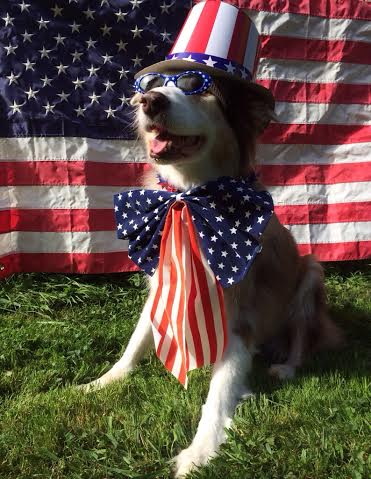

In [72]:
# Display the image of Atticus, the highest rated dog
Image('https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

### 2. What are the most common dog names in the data?

In [73]:
# Check most common dog names
common_names = df_master.name.value_counts()[0:10]
common_names

Charlie    10
Cooper     10
Oliver     10
Tucker      9
Penny       9
Lucy        9
Winston     8
Sadie       8
Daisy       7
Toby        7
Name: name, dtype: int64

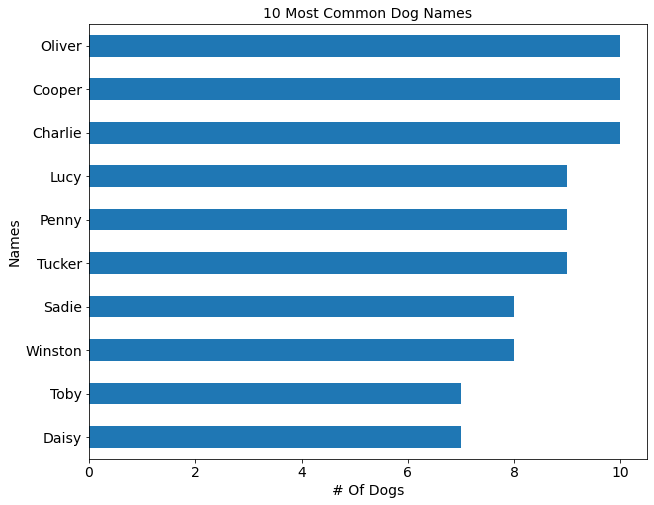

In [74]:
common_names.sort_values().plot(kind='barh', figsize=(10, 8), fontsize=14)
plt.title('10 Most Common Dog Names', fontsize=14)
plt.xlabel('# Of Dogs', fontsize=14)
plt.ylabel('Names', fontsize=14);

### 3. What is the most common dog breed predicted by the algorithm?

In [75]:
# Checking the five more common dog breeds predicted by the algorithm
df_master.p1.value_counts()[0:5]

golden_retriever      137
Labrador_retriever     91
Pembroke               88
Chihuahua              78
pug                    54
Name: p1, dtype: int64

In [76]:
# Checking the algorithm confidence for the most common dog breed
df_master.query('p1 == "golden_retriever"').p1_conf.mean()

0.7281163138686131

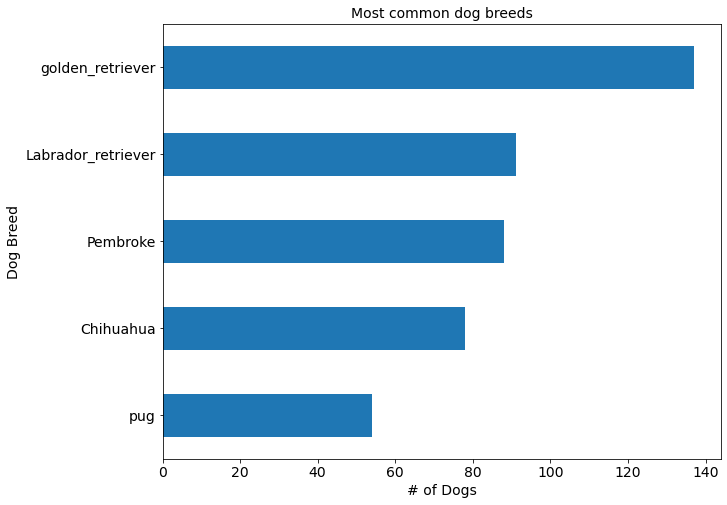

In [77]:
df_master.p1.value_counts()[0:5].sort_values().plot(kind='barh', figsize=(10, 8), fontsize=14)
plt.title('Most common dog breeds', fontsize=14)
plt.xlabel('# of Dogs', fontsize=14)
plt.ylabel('Dog Breed', fontsize=14);

### 4. What is the most retweed tweet from the account?

In [78]:
# Checking the mean number of retweets for a tweet
df_master.retweet_count.mean()

2259.0753948038714

In [79]:
# Checking the max number of retweets for a single tweet
df_master.retweet_count.max()

70771

In [80]:
df_master.query('retweet_count == 70771')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
762,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,70771,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


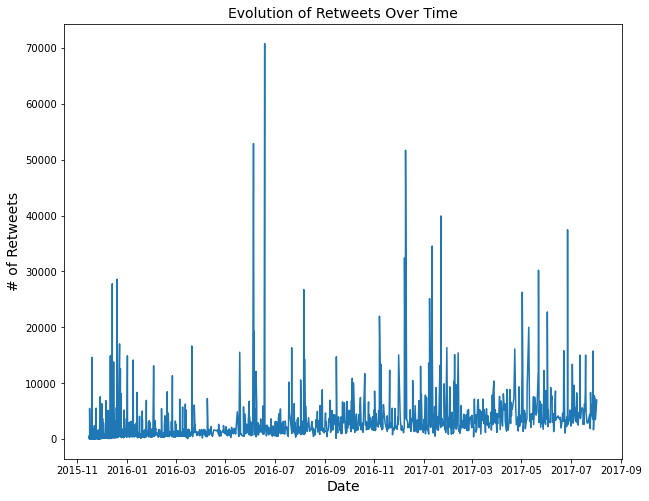

In [81]:
# Plot the evolution over time of retweets
plt.subplots(figsize=(10, 8))
plt.plot(df_master['timestamp'], df_master['retweet_count'])
plt.title('Evolution of Retweets Over Time', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('# of Retweets', fontsize=14);

### Insights:
1. The average rating for a dog is 12.22 and the highest rating dog was Atticus with a rating of 1776. Atticus rating was probably a joke with the year of independence of the USA on a 4th of July tweet.

2. The most common name for dogs in the data are: Charlie, Cooper and Oliver.

3. The most common dog breed predicted by the algorithm is the Golden Retriever and the algorithm confidence on this prediction was 0.73.

4. The tweet with the highest number of retweets had 70771 retweets, that much more than the average number of retweets (2259). It included a video of a dog swimming in a pool and had a rating of 13/10.

All insights were made analysing the cleaned dataset.